In [ ]:
from qa import load_data
 
cifar10_dir = r'C:\Users\czl\机器学习\cifar-10-batches-py'
(X_train, y_train), (X_test, y_test) = load_data(cifar10_dir)

D:\anoconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


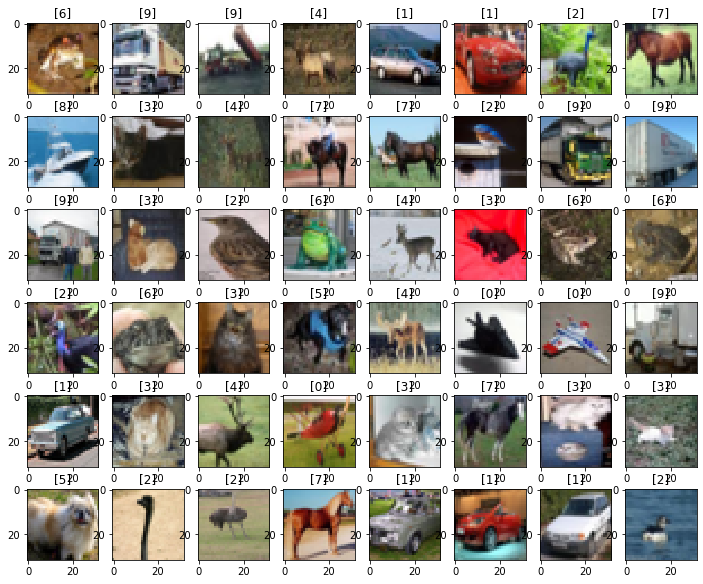

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
ii, jj = 8, 6
for i in range(ii*jj):  
    plt.subplot(jj, ii, i+1)
    plt.imshow(X_train[i],interpolation='nearest')
    plt.title(y_train[i])
plt.show()

In [30]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train[:,5,:])

[[[1.0918878e-03 7.3817762e-04 4.4598232e-04]
  [1.2918109e-03 8.1507111e-04 3.6908881e-04]
  [1.6916571e-03 1.1226452e-03 5.6901196e-04]
  ...
  [1.0303730e-03 5.9976935e-04 2.3068051e-04]
  [5.3825456e-04 1.5378701e-04 0.0000000e+00]
  [4.9211847e-04 1.9992310e-04 6.1514809e-05]]

 [[2.0915035e-03 2.2145330e-03 2.2914265e-03]
  [2.0915035e-03 2.2914265e-03 2.5374857e-03]
  [1.9530950e-03 2.2760478e-03 2.5221070e-03]
  ...
  [1.0303730e-03 1.0611304e-03 8.7658595e-04]
  [1.2456748e-03 1.2764322e-03 1.0918878e-03]
  [1.3994618e-03 1.4302192e-03 1.2456748e-03]]

 [[3.9215689e-03 3.9215689e-03 3.9215689e-03]
  [3.9215689e-03 3.9215689e-03 3.9215689e-03]
  [3.9215689e-03 3.9215689e-03 3.9215689e-03]
  ...
  [3.9215689e-03 3.9215689e-03 3.9215689e-03]
  [3.9215689e-03 3.9215689e-03 3.9215689e-03]
  [3.9215689e-03 3.9215689e-03 3.9215689e-03]]

 ...

 [[2.9988466e-03 3.5371012e-03 3.8139177e-03]
  [2.4759709e-03 3.3371781e-03 3.8292964e-03]
  [2.2452904e-03 3.3525568e-03 3.8600538e-03]
  ..

In [31]:
from keras.utils import np_utils  
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [32]:
from keras.models import Sequential  
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()

In [33]:
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))

In [34]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [35]:
model.add(Conv2D(64, (3, 3)))

In [36]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [37]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 512)               1

In [39]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [40]:
model.fit(X_train, Y_train, batch_size=100, epochs=20)

Epoch 1/20
500/500 [==============================] - 17s 32ms/step - loss: 1.9334 - accuracy: 0.3050
Epoch 2/20
500/500 [==============================] - 16s 32ms/step - loss: 1.6405 - accuracy: 0.4201
Epoch 3/20
500/500 [==============================] - 16s 32ms/step - loss: 1.4936 - accuracy: 0.4753
Epoch 4/20
500/500 [==============================] - 16s 33ms/step - loss: 1.3726 - accuracy: 0.5207
Epoch 5/20
500/500 [==============================] - 17s 34ms/step - loss: 1.2699 - accuracy: 0.5576
Epoch 6/20
500/500 [==============================] - 17s 34ms/step - loss: 1.1790 - accuracy: 0.5900
Epoch 7/20
500/500 [==============================] - 17s 33ms/step - loss: 1.0948 - accuracy: 0.6220
Epoch 8/20
500/500 [==============================] - 16s 32ms/step - loss: 1.0245 - accuracy: 0.6460
Epoch 9/20
500/500 [==============================] - 16s 33ms/step - loss: 0.9558 - accuracy: 0.6709
Epoch 10/20
500/500 [==============================] - 16s 32ms/step - loss: 0.895

In [41]:
score = model.evaluate(X_test, Y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 1.4482 - accuracy: 0.6228
Test loss:  1.448237419128418
Test accuracy:  0.6227999925613403
